# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3 

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_current_price= btc_data['data']['1']['quotes']['CAD']['price']


# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_current_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto

my_btc_value = btc_current_price * my_btc
my_eth_value = eth_current_price * my_eth


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $73422.16
The current value of your 5.3 ETH is $26928.04


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2") 

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [16]:
# Format current date as ISO format

today= pd.Timestamp("2020-12-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_portfolio =alpaca.get_barset (
    tickers,
    timeframe,
    start =today,
    limit=1000
).df

# Preview DataFrame
display(df_portfolio.head())

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-12-15 00:00:00-05:00  117.95  118.030  117.9000  118.03  3826081  367.40   
2020-12-16 00:00:00-05:00  117.83  118.033  117.7610  117.97  4415156  369.82   
2020-12-17 00:00:00-05:00  118.01  118.060  117.7299  117.84  6187968  371.94   
2020-12-18 00:00:00-05:00  117.97  117.970  117.7600  117.81  3472883  370.97   
2020-12-21 00:00:00-05:00  117.92  117.960  117.7500  117.79  3645094  364.97   

                                                                 
                               high       low   close    volume  
time                                                             
2020-12-15 00:00:00-05:00  369.5798  365.9200  369.57  50997562  
2020-12-16 00:00:00-05:00  371.1600  368.8676  370.14  47524603  
2020-12-17 00:00:00-05:00  372.4600  371.0500  372.21  50863245  
2020-12-18 00:00:00-05:00  371.1500  367.0200  369.13  89156141  
2020-12-21 00:00:00-05:00  378.4600  362.0300  367.93  73946581

In [17]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.03
Current SPY closing price: $369.57


In [18]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18478.50
The current value of your 200 AGG shares is $23606.00


### Savings Health Analysis

In [40]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
saving_amount = {
    "amount": (my_btc_value + my_eth_value, my_agg_value + my_spy_value)}

#Set crypto and shares as indexes
saving_sources = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(saving_amount, index = saving_sources)

# Display savings DataFrame
display(df_savings)


,amount
crypto,100350.203209
shares,42084.500000


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

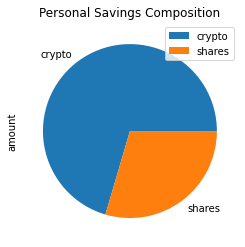

In [29]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title = "Personal Savings Composition")

In [37]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount = df_savings["amount"].sum()

# Validate saving health
if total_amount > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_amount == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"Ooops! You are ${emergency_fund - total_amount} away from reaching your financial goal." )

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [39]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-15', tz='America/New_York').isoformat()

In [42]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189.0   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982.0   
2017-12-29 00:00:00-05:00  109.28  109.3900  109.2400  109.340  2073522.0   
2018-01-02 00:00:00-05:00  109.26  109.3100  108.9700  109.170  5495219.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-12-26 00:00:00-05:00     NaN     NaN     NaN     NaN         NaN  
2017-12-27 00:00:00-05:00  267.36  267.73  267.01  267.33  32573906.0  
2017-12-28 00:00:00-05:00  267.85  267.92  267.45  267.86  23583584.0  
2017-12-29 00:00:00-05:00  268.55  268.55  266.64  266.88  43875796.0  
2018-01-02 00:00:00-05:00  267.84  268.81  267.40  268.80  50844678.0

In [44]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_bonds = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30)

In [45]:
# Printing the simulation input data
MC_stocks_bonds.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189.0   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982.0   
2017-12-29 00:00:00-05:00  109.28  109.3900  109.2400  109.340  2073522.0   
2018-01-02 00:00:00-05:00  109.26  109.3100  108.9700  109.170  5495219.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-12-26 00:00:00-05:00          NaN     NaN     NaN     NaN     NaN   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.73  267.01  267.33   
2017-12-28 00:00:00-05:00    -0.000595  267.85  267.92  267.45  267.86   
2017-12-29 00:00:00-05:00     0.001099  268.55  268.55  266.64  266.88   
2018-01-02 00:00:00-05:00    -0.001555  267.84  268.81  267.40  268.80   

                                                    
                               volume daily_return  
time                                                
2017-12-26 00:00:00-05:00         NaN          NaN  
2017-12-27 00:00:00-05:00  32573906.0          NaN  
2017-12-28 00:00:00-05:00  23583584.0     0.001983  
2017-12-29 00:00:00-05:00  43875796.0    -0.003659  
2018-01-02 00:00:00-05:00  50844678.0     0.007194

In [46]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_bonds.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/dariamerkulenko/05-APIs/Unit 5 Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982797,1.011210,0.999956,1.003224,0.994561,0.996918,1.010524,0.994369,1.008388,0.991416,...,0.984444,1.000604,0.996901,0.979983,0.999936,1.007051,0.996892,1.020067,1.003579,0.998291
2,0.983803,1.005139,1.007578,0.990758,0.983264,1.005601,0.996152,0.994407,0.996504,0.989905,...,0.962746,1.000847,0.997193,0.977360,0.988152,1.012138,1.000134,1.023789,0.994683,1.003065
3,0.989605,0.995005,1.017133,0.991292,0.982517,1.006769,0.993922,0.992665,1.001780,1.010720,...,0.955632,1.008578,0.995119,0.960987,0.995883,1.008828,1.003929,1.008572,0.994842,1.007957
4,0.995671,1.012525,1.003075,0.986889,1.010335,0.996472,0.994598,0.992279,1.005888,1.006531,...,0.970205,1.022332,0.998238,0.962633,0.995931,1.025266,1.007566,1.006490,0.990634,1.004844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,29.755467,14.660290,5.902082,37.430484,8.297152,29.268033,13.597159,18.264748,15.873290,28.763302,...,7.465171,29.250694,6.057320,27.669584,22.273637,34.445985,10.795576,13.069888,15.879611,27.431667
7557,29.712836,14.670416,5.837328,37.415079,8.328731,28.974342,13.720640,18.250406,15.705240,29.145006,...,7.393575,29.062294,6.065045,27.990891,22.182216,34.405071,10.804952,13.050463,15.959364,27.221018
7558,29.361264,14.772483,5.866062,37.661305,8.306899,29.463810,13.760909,18.518606,15.847251,29.137895,...,7.370374,28.931282,5.997976,27.884649,21.989498,34.348114,10.749791,13.029989,15.816520,27.241412
7559,29.065761,14.720072,5.877166,37.996745,8.317650,29.283608,13.578907,18.245412,15.703260,29.215556,...,7.400853,28.779761,6.024297,28.063810,21.837606,34.399950,10.675864,13.240633,15.941739,27.676866


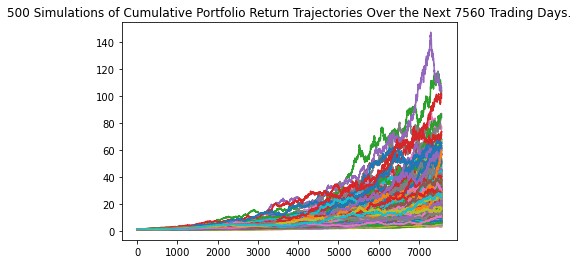

In [48]:
# Plot simulation outcomes
line_plot = MC_stocks_bonds.plot_simulation()

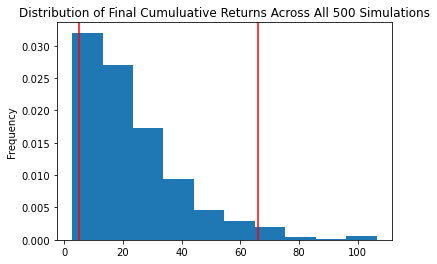

In [49]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stocks_bonds.plot_distribution()

### Retirement Analysis

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
portf_tbl = MC_stocks_bonds.summarize_cumulative_return()

# Print summary statistics
print(portf_tbl)

count           500.000000
mean             23.104145
std              16.829994
min               2.669193
25%              10.851551
50%              18.129526
75%              30.464372
max             106.361513
95% CI Lower      5.127799
95% CI Upper     65.982596
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [54]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(portf_tbl[8]*20000,2)
ci_upper = round(portf_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $102555.98 and $1319651.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [55]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(portf_tbl[8]*30000,2)
ci_upper = round(portf_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $153833.96 and $1979477.88


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [56]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [57]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/dariamerkulenko/05-APIs/Unit 5 Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986049,1.006942,1.005113,0.985417,0.991592,0.993203,0.995773,0.995918,0.985891,1.003792,...,1.003266,0.991997,0.998708,1.007065,1.001584,0.999109,0.994233,0.985879,0.989802,0.994265
2,0.985504,1.010579,0.998350,0.991730,0.984878,0.983362,1.006209,1.001708,0.975554,1.002883,...,1.000642,0.991398,1.002445,0.998238,0.989348,1.000459,0.989292,0.988071,0.995144,0.996134
3,0.987868,1.018113,1.002007,0.994039,0.988930,0.975196,1.012458,1.003496,0.975582,1.018382,...,1.016549,1.005228,1.014339,0.987574,0.986775,1.005848,1.007123,0.988623,1.000849,0.985360
4,0.996465,1.004971,1.007172,0.996215,0.988699,0.969739,1.017069,1.007484,0.989811,1.009287,...,1.038208,1.004003,1.015785,0.981125,0.986875,1.002071,1.008454,0.999489,1.003030,1.005700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.839371,1.771566,1.288408,1.784384,1.767046,1.847727,1.605244,1.246227,1.824923,2.663644,...,1.435922,1.669116,1.752874,2.051911,1.408593,1.136043,1.438556,2.730156,1.442899,1.157821
1257,1.839371,1.784343,1.287748,1.780350,1.784826,1.837158,1.615640,1.251828,1.816673,2.668588,...,1.435877,1.653551,1.744111,2.049325,1.431527,1.133840,1.433443,2.744998,1.457948,1.156881
1258,1.857616,1.788105,1.278158,1.761403,1.791434,1.850884,1.609791,1.263368,1.823174,2.686461,...,1.446582,1.650255,1.734245,2.064868,1.418160,1.129998,1.409410,2.772944,1.475867,1.143151
1259,1.841069,1.784462,1.267620,1.764432,1.802781,1.860215,1.625352,1.259307,1.842690,2.654889,...,1.452581,1.666535,1.740530,2.062740,1.419086,1.138075,1.402489,2.774798,1.468960,1.156675


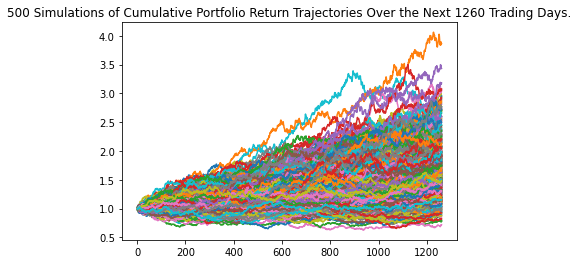

In [59]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

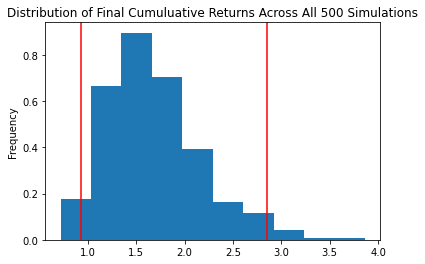

In [60]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(five_year_tbl)

count           500.000000
mean              1.673707
std               0.490120
min               0.718028
25%               1.328180
50%               1.592898
75%               1.925084
max               3.863317
95% CI Lower      0.924867
95% CI Upper      2.856576
Name: 1260, dtype: float64


In [63]:
# Set an increased initial investment

initial_investment = 20000 * 2

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_year_tbl[8]*40000,2)
ci_upper_five = round(five_year_tbl[9]*40000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 5 years will end within in the range of $36994.69 and $114263.02


### Ten Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [65]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/dariamerkulenko/05-APIs/Unit 5 Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990094,1.007384,1.006361,1.008117,0.985808,1.000725,0.998706,1.011072,0.991889,0.985749,...,1.009684,1.005037,0.991811,1.005426,1.004560,1.013470,1.009307,1.006972,1.017916,0.998958
2,0.993540,1.027203,1.007414,1.018514,0.984141,1.003934,1.007747,1.012651,0.996159,0.975938,...,1.001216,1.005241,1.005559,1.016619,1.007254,1.011349,1.014546,1.006853,1.014004,0.994611
3,1.001255,1.028057,1.016762,1.023454,0.977405,1.008507,1.010816,0.995847,0.994840,0.971146,...,0.998192,1.001962,1.007044,1.007049,0.990772,1.003689,1.015157,1.007893,1.011263,0.994633
4,1.001908,1.019616,1.008530,1.036631,0.989984,1.007104,1.007614,0.985567,0.988812,0.965552,...,1.003913,1.020312,1.025215,1.010684,0.992973,1.012769,1.026164,1.006517,1.031561,1.000596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.543479,2.449196,2.628416,2.828918,7.806602,3.767591,1.499388,1.912234,4.451040,1.828196,...,2.239168,2.381531,3.446510,2.205471,2.530370,4.452806,5.089662,5.074922,4.079458,3.414373
2517,1.550317,2.475113,2.631373,2.856627,7.859734,3.771977,1.499807,1.926834,4.411968,1.849017,...,2.238555,2.404782,3.472946,2.202450,2.551412,4.430489,5.104126,5.081233,4.079187,3.420413
2518,1.536625,2.492502,2.616486,2.877081,7.831777,3.756148,1.504610,1.927712,4.400023,1.863143,...,2.255045,2.415613,3.492923,2.192890,2.574634,4.393340,5.072230,5.060506,4.053799,3.415422
2519,1.537235,2.524307,2.628918,2.903179,7.795625,3.807256,1.527023,1.935141,4.407814,1.866970,...,2.264228,2.404932,3.505382,2.171566,2.578913,4.410051,5.101078,5.039094,4.073386,3.404534


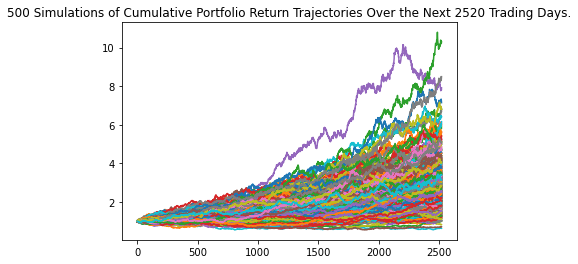

In [66]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

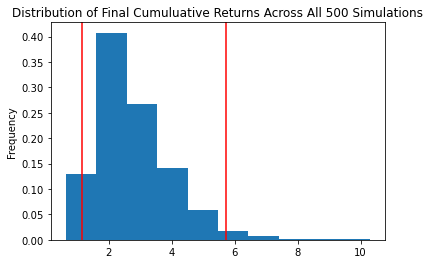

In [67]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(ten_year_tbl)

count           500.000000
mean              2.792554
std               1.233477
min               0.634062
25%               1.933896
50%               2.533093
75%               3.429121
max              10.299038
95% CI Lower      1.133457
95% CI Upper      5.736662
Name: 2520, dtype: float64


In [69]:
# Set initial investment
initial_investment = 20000 * 2

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_year_tbl[8]*40000,2)
ci_upper_ten = round(ten_year_tbl[9]*40000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $45338.27 and $229466.49
